>[Introduction](#scrollTo=MFoav6XkPLDz)

>>[1.1. Standards for Inclusion](#scrollTo=MFoav6XkPLDz)

>>[1.2. Goal](#scrollTo=MFoav6XkPLDz)

>[Loading the data and python packages](#scrollTo=mWS1BDdBSIIg)

>>[2.1. Loading the python packages](#scrollTo=vqLNp70WSgbA)

>>[2.2. Loading the Data](#scrollTo=SX4nC_23Tp-L)

>>[2.3. Data Wrangling](#scrollTo=M1imzykkVbv_)

>[Exploratory Data Analysis](#scrollTo=63FeEUQ3ZjSV)

>>[3.1. Descriptive Statistics](#scrollTo=1WZi5d8NZoDc)

>[Data Preparation](#scrollTo=gsUUaEZaYshv)

>>[4.1. Data Cleaning](#scrollTo=XKIkmwAjY2Sb)

>>[4.2. Handling Categorical Data](#scrollTo=T-F4kZHXZeMs)

>>[4.3. Feature Selection](#scrollTo=XbDluY65dJUT)

>>[Data Modeling](#scrollTo=dh6QOIKjrpEI)

>>[4.1. Data Transformation](#scrollTo=8oEXD9C4pn7d)

>>[4.1. Train Test Split](#scrollTo=cS_AOuAKr5iz)

>>>[4.1.2. Rescale Data](#scrollTo=QjBkDChnptha)

>[Test Options and Evaluation Metrics](#scrollTo=zUMyROjysAbM)

>[Model Tuning and Grid Search](#scrollTo=Zd8cTGTRtD2w)

>[Finalise the Model](#scrollTo=JtIdNWA9xW5k)

>>[6.1. Results on the Test Dataset](#scrollTo=Rux0X82yxZ2U)

>>[6.2. Variable Intuition/Feature Importance](#scrollTo=OLDUy-jiymnp)

>>[7.3. Saving Model for Later Use](#scrollTo=SDaLX0SdvXe4)



<a id='0'></a>
# 1. Introduction
The dataset hosted at arn:aws:s3:::afsis contains field and laboratory measurements of soil samples collected through the Africa Soil Information Service (AfSIS) project, which spanned from 2009 through 2018. Georeferenced soil samples were collected from many countries throughout Sub-Saharan Africa, and their nutrient content was analyzed using both wet chemistry (e.g. Mehlich-3) and dry chemistry (e.g., infrared spectroscopy, x-ray fluorescence). The two types of data can be paired to form a training dataset for machine learning, such that certain nutrients measured by wet chemical analyses can be well predicted from dry chemistry.

## 1.1. Standards for Inclusion
To maximize the utility of this dataset for spectral inference and geospatial mapping, we are only including data satisfying the following constraints:

The soil sample corresponding to this measurement can be associated with a georeference inside Africa.
A dry chemistry measurement is included only if there exists some wet chemistry measurement of the same soil sample.
A wet chemistry measurement is included only if there exists some dry chemistry measurement of the same soil sample.
The chemical analyses of soils were performed by three different labs, all ISO/IEC 17025:2005 certified: the World Agroforestry Centre (ICRAF), Crop Nutrition Laboratory Services Ltd. (CROPNUTS), and Rothamsted Research (RRES). Careful documentation for all procedures used by the labs have also been included in this dataset.

## 1.2. Goal
The aim of this notebook is to wrangle, analyze and treat the datasets from AfSIS to create a predictive and classification model using Machine Learning.

<a id='1'></a>
# 2. Loading the data and python packages

<a id='1'></a>
## 2.1. Loading the python packages

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Saving the Model
from pickle import dump
from pickle import load

<a id='1.2'></a>
## 2.2. Loading the Data

In [ ]:
# load dataset
txrf = read_csv('/content/drive/MyDrive/Data Science/AfSIS/TXRF.csv')
wet = read_csv('/content/drive/MyDrive/Data Science/AfSIS/Wet_Chemistry_CROPNUTS.csv')
dataset = wet

<a id='1.3'></a>
## 2.3. Data Wrangling

In [ ]:
dataset = dataset[["SSN", "Public", "Latitude", "Longitude", "Cultivated", "M3 Al", "M3 B", "M3 Ca",
                   "M3 Cu","M3 Fe", "M3 K", "M3 Mg", "M3 Mn", "M3 Na", "M3 P", "M3 S", "M3 Zn","PH", "PSI"]]
dataset.head()

,SSN,Public,Latitude,Longitude,Cultivated,M3 Al,M3 B,M3 Ca,M3 Cu,M3 Fe,M3 K,M3 Mg,M3 Mn,M3 Na,M3 P,M3 S,M3 Zn,PH,PSI
0,icr025136,True,-6.851620,34.243313,False,446.0,0.110,1123.00,0.39,51.00,74.0,97.00,112.0,23.00,7.130,7.000,2.120,7.010,4.230
1,icr068579,True,11.280658,8.166768,NaN,511.0,0.001,641.00,0.39,95.50,71.4,114.00,27.3,22.00,1.980,4.730,0.790,5.880,17.900
2,icr048978,True,-29.972100,22.710200,False,194.0,0.340,8540.00,0.62,59.60,129.0,217.00,88.4,91.40,6.280,13.200,0.410,8.580,53.600
3,icr056481,True,-16.066365,28.326498,True,1070.0,0.001,1070.00,6.05,68.10,46.8,198.00,136.0,8.83,1.260,8.410,0.630,6.280,86.300
4,icr034190,True,8.158693,9.930640,True,503.1,0.192,695.27,0.51,82.47,92.8,165.41,109.3,34.97,9.342,8.991,0.641,6.707,0.205


<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [ ]:
# shape
dataset.shape

(1843, 19)

In [ ]:
# types
set_option('display.max_rows', 500)
dataset.dtypes

,0
SSN,object
Public,bool
Latitude,float64
Longitude,float64
Cultivated,object
M3 Al,float64
M3 B,float64
M3 Ca,float64
M3 Cu,float64
M3 Fe,float64


In [ ]:
# describe data
pd.set_option('display.precision', 3)
dataset.describe()

,Latitude,Longitude,M3 Al,M3 B,M3 Ca,M3 Cu,M3 Fe,M3 K,M3 Mg,M3 Mn,M3 Na,M3 P,M3 S,M3 Zn,PH,PSI
count,1843.000,1843.000,1839.000,1839.000,1839.000,1839.000,1839.000,1839.000,1839.000,1839.000,1839.000,1839.000,1839.000,1839.000,1839.000,1839.000
mean,-4.922,22.363,816.088,0.453,1864.879,1.781,112.794,173.203,312.238,100.374,143.499,12.492,25.522,1.546,6.208,75.706
std,12.938,16.846,463.101,1.817,3489.761,2.083,82.213,294.327,420.277,101.755,1188.771,29.187,168.712,1.795,1.074,76.469
min,-29.981,-13.433,1.672,0.000,0.001,0.001,1.260,0.001,0.001,0.570,0.000,0.001,0.000,0.001,3.610,0.000
25%,-16.069,9.348,455.000,0.001,287.050,0.489,60.400,50.790,77.405,24.000,22.000,2.565,5.070,0.720,5.430,21.802
50%,-6.126,29.410,734.000,0.110,626.700,1.120,92.730,89.200,156.000,70.530,34.200,5.010,7.750,1.110,6.080,54.100
75%,8.131,35.500,1098.000,0.370,1707.000,2.436,140.000,172.000,384.000,140.600,51.005,10.190,12.700,1.790,6.690,102.000
max,14.880,48.757,3041.000,55.090,35200.000,23.700,981.000,5047.000,4740.000,686.600,31800.000,396.000,3940.000,36.510,9.860,452.888


We can see that there is a negative value on pressure(PSI) and M3 B which represents a outlier. It could be a uncalibrated equipament or handling error during the measurement. All values that present negative values in pressure will be replaced by 0.

In [ ]:
# Replacing negative values of soil compactation
dataset.loc[dataset['PSI']<0, 'PSI'] = 0
dataset.loc[dataset['M3 B']<0, 'M3 B'] = 0

In [ ]:
# class distribution
dataset.groupby('Cultivated').size()

,0
Cultivated,
False,626
True,419


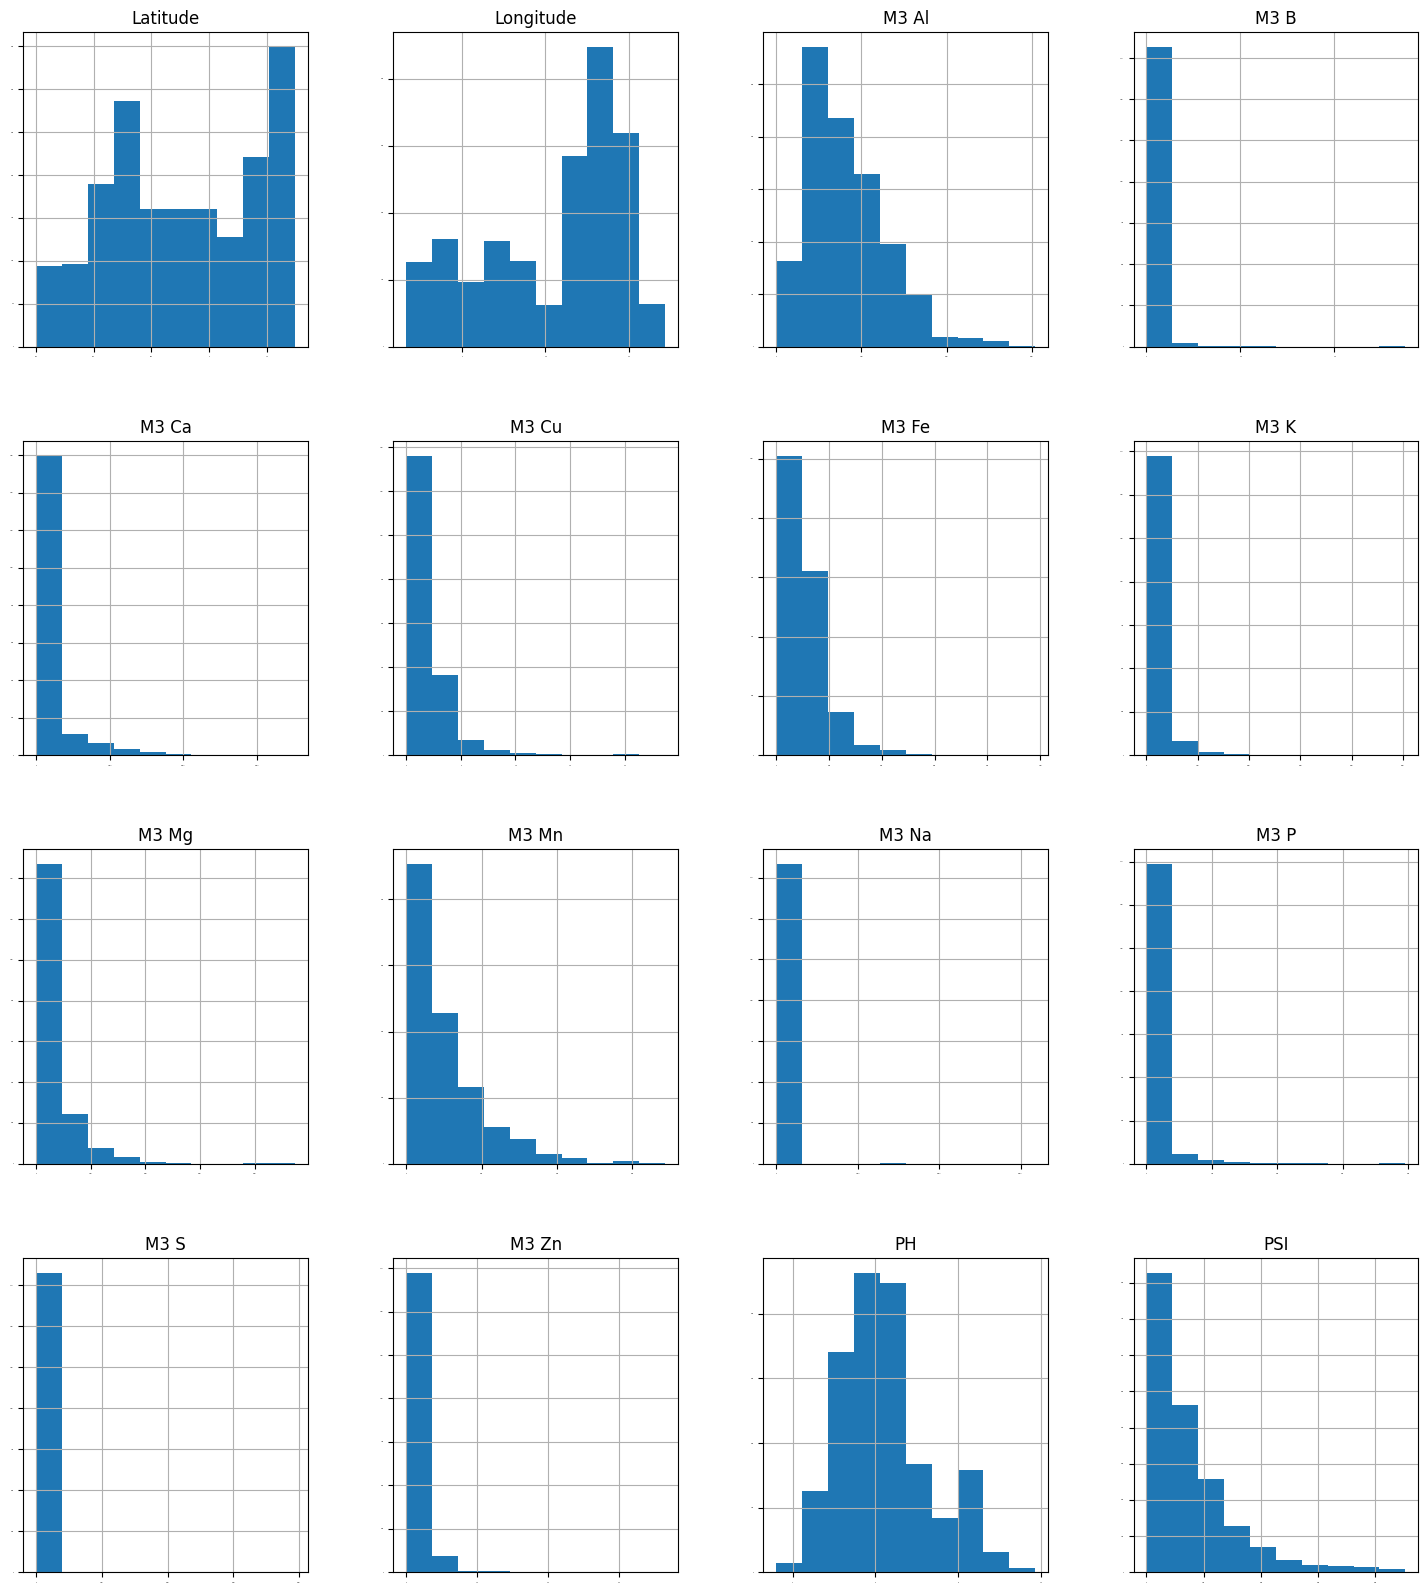

In [ ]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(18,20))
pyplot.show()

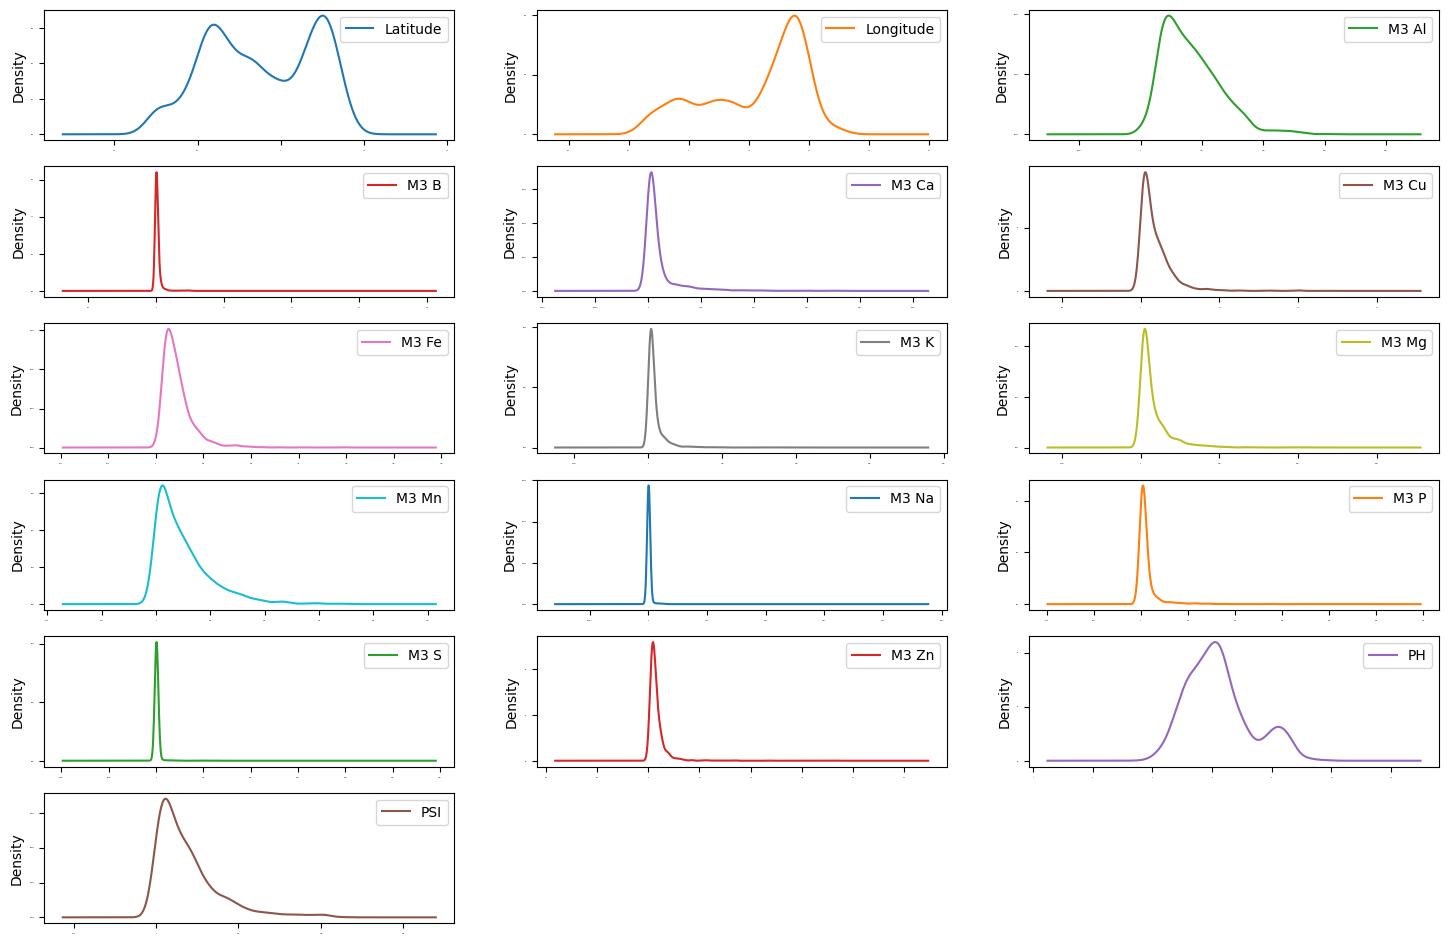

In [ ]:
# density
dataset.plot(kind='density', subplots=True, layout=(10,3), sharex=False, legend=True, fontsize=1, figsize=(18,20))
pyplot.show()

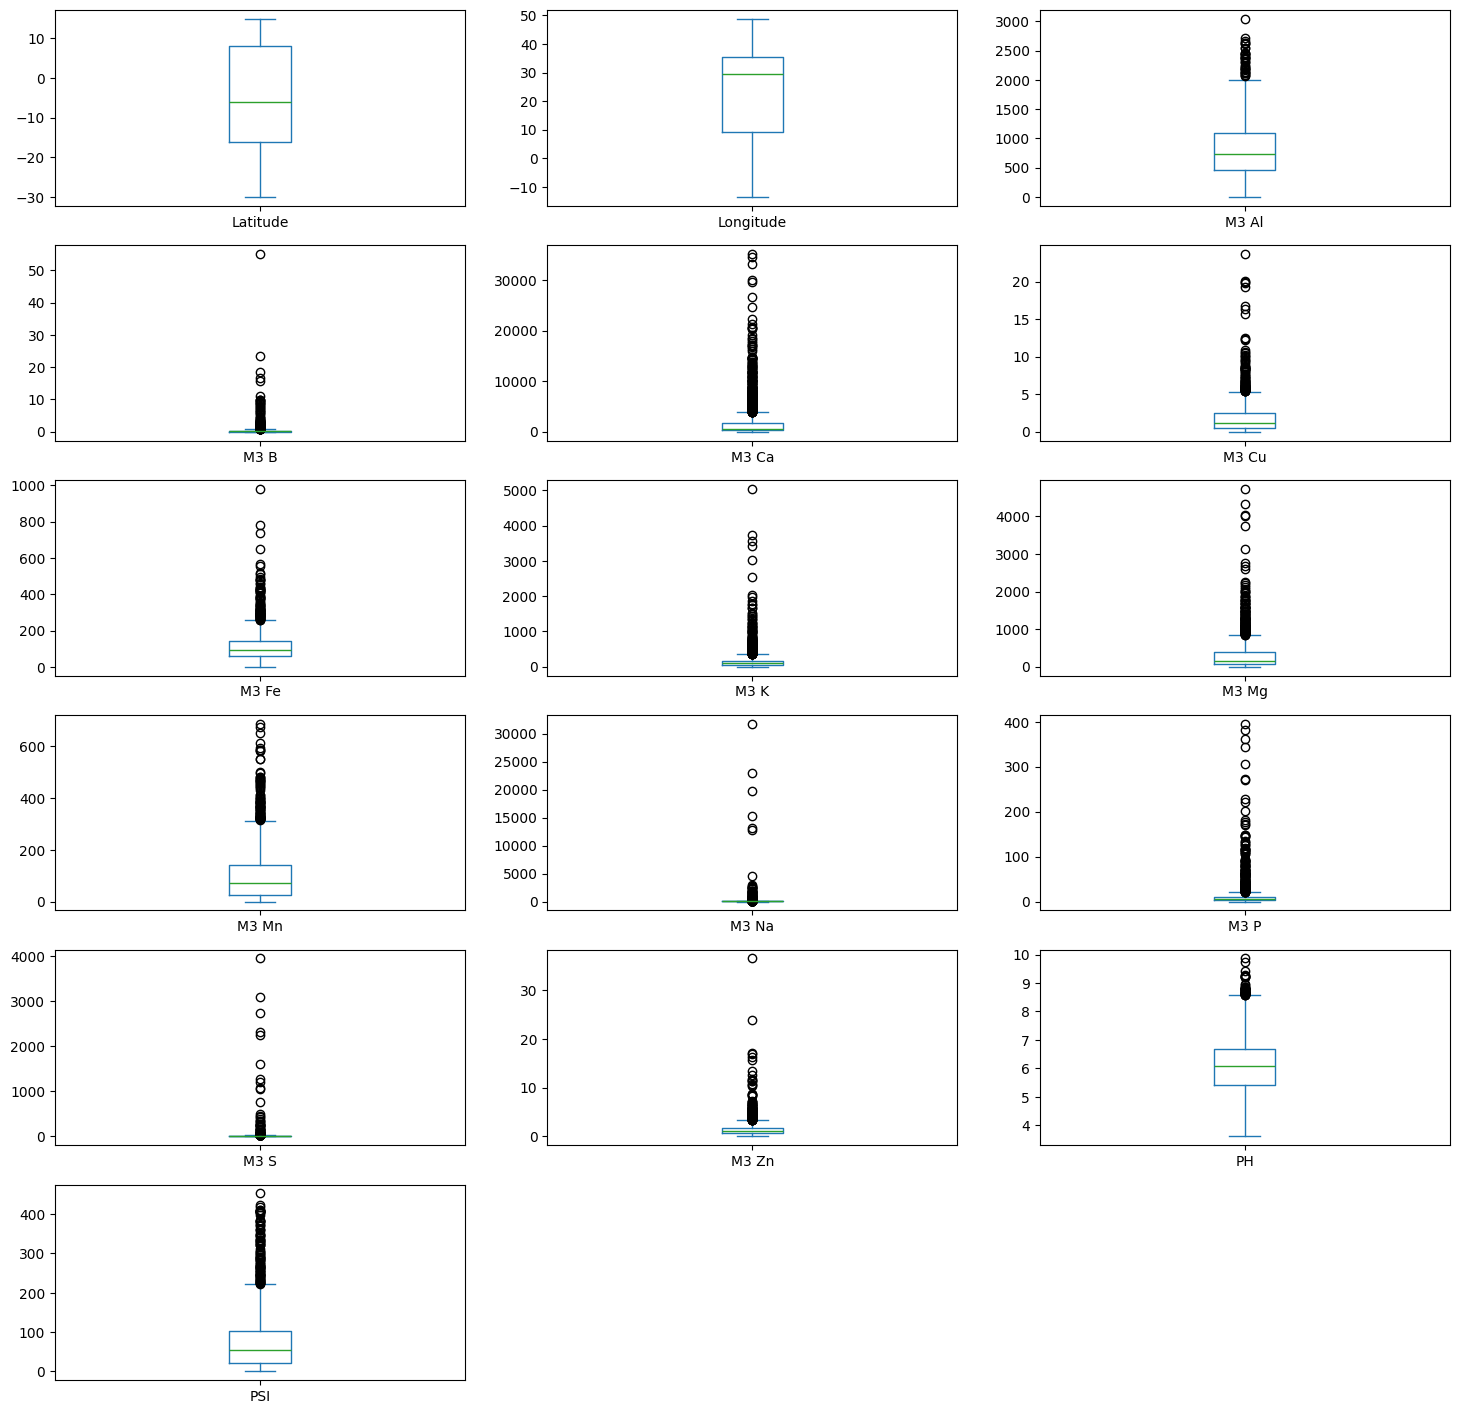

In [ ]:
#Box and Whisker Plots
dataset.plot(kind='box', subplots=True, layout=(10,3), sharex=False, sharey=False, figsize=(18,30))
pyplot.show()

In [ ]:
data_corr = dataset.drop(columns = ['SSN','Public'])
data_corr.head()

,Latitude,Longitude,Cultivated,M3 Al,M3 B,M3 Ca,M3 Cu,M3 Fe,M3 K,M3 Mg,M3 Mn,M3 Na,M3 P,M3 S,M3 Zn,PH,PSI
0,-6.852,34.243,False,446.0,0.110,1123.00,0.39,51.00,74.0,97.00,112.0,23.00,7.130,7.000,2.120,7.010,4.230
1,11.281,8.167,NaN,511.0,0.001,641.00,0.39,95.50,71.4,114.00,27.3,22.00,1.980,4.730,0.790,5.880,17.900
2,-29.972,22.710,False,194.0,0.340,8540.00,0.62,59.60,129.0,217.00,88.4,91.40,6.280,13.200,0.410,8.580,53.600
3,-16.066,28.326,True,1070.0,0.001,1070.00,6.05,68.10,46.8,198.00,136.0,8.83,1.260,8.410,0.630,6.280,86.300
4,8.159,9.931,True,503.1,0.192,695.27,0.51,82.47,92.8,165.41,109.3,34.97,9.342,8.991,0.641,6.707,0.205


<Axes: title={'center': 'Correlation Matrix'}>

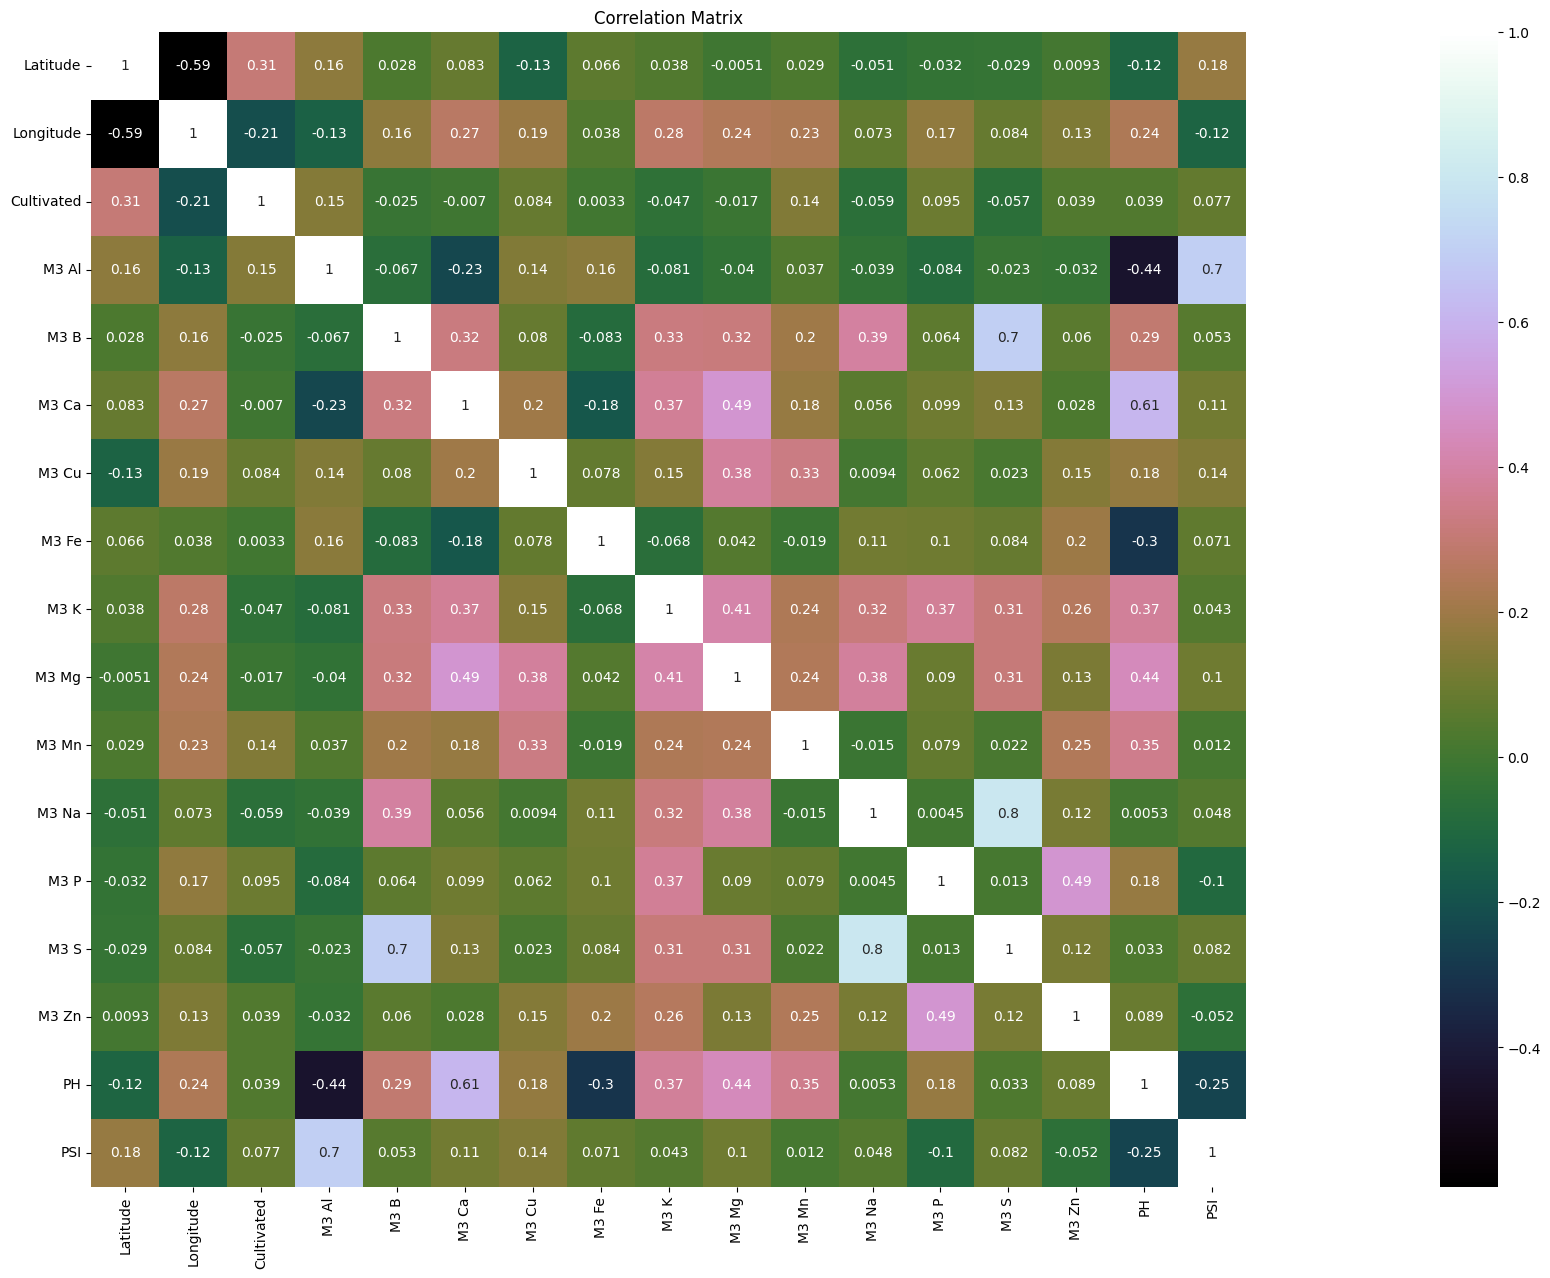

In [ ]:
# correlation
correlation = data_corr.corr()
pyplot.figure(figsize=(50,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<a id='3'></a>
# 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning
Check for the NAs in the rows, either drop them or fill them with the mean of the column

In [ ]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


Given that there are null values drop the rown contianing the null values.

In [ ]:
# Drop the rows containing NA
dataset = dataset.dropna(axis=0)
# Fill na with 0
#dataset.fillna('0')

#Filling the NAs with the mean of the column.
#dataset['col'] = dataset['col'].fillna(dataset['col'].mean())
dataset = dataset.drop(columns=['SSN', 'Public','Latitude',	'Longitude'])
print('Null Values =',dataset.isnull().values.any())

Null Values = False


In [ ]:
dataset.head()

NameError: name 'dataset' is not defined

<a id='3.2'></a>
## 4.2. Handling Categorical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
dataset["Cultivated_Code"] = lb_make.fit_transform(dataset["Cultivated"])
dataset.drop(['Cultivated'],axis=1,inplace=True)

In [ ]:
dataset.head()

,M3 Al,M3 B,M3 Ca,M3 Cu,M3 Fe,M3 K,M3 Mg,M3 Mn,M3 Na,M3 P,M3 S,M3 Zn,PH,PSI,Cultivated_Code
0,446.0,0.110,1123.00,0.390,51.00,74.00,97.00,112.0,23.00,7.130,7.000,2.120,7.010,4.230,0
2,194.0,0.340,8540.00,0.620,59.60,129.00,217.00,88.4,91.40,6.280,13.200,0.410,8.580,53.600,0
3,1070.0,0.001,1070.00,6.050,68.10,46.80,198.00,136.0,8.83,1.260,8.410,0.630,6.280,86.300,1
4,503.1,0.192,695.27,0.510,82.47,92.80,165.41,109.3,34.97,9.342,8.991,0.641,6.707,0.205,1
5,1447.0,0.242,3399.98,2.093,69.32,142.74,523.08,122.6,38.18,3.228,11.818,0.459,5.815,29.711,1


<a id='3.3'></a>
## 4.3. Feature Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable.The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Dataset.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=5)
bestfeatures

SelectKBest(k=5, score_func=<function chi2 at 0x787ab2188220>)

In [ ]:
Y= dataset["Cultivated_Code"]
X = dataset.loc[:, dataset.columns != 'Cultivated_Code']
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

    Specs      Score
8   M3 Na  51146.385
0   M3 Al   5576.390
10   M3 S   4283.834
7   M3 Mn   2013.169
9    M3 P    636.798
5    M3 K    527.781
13    PSI    385.486
2   M3 Ca    214.109
6   M3 Mg    181.829
3   M3 Cu     18.713


<a id='4.0'></a>

## 4. Data Modeling

<a id='3.4'></a>

## 4.1. Data Transformation

<a id='4.1'></a>
## 4.1. Train Test Split

In [ ]:
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

<a id='3.4.1'></a>
### 4.1.2. Rescale Data
When your data is comprised of attributes with varying scales, many machine learning algorithms
can benefit from rescaling the attributes to all have the same scale. Often this is referred to
as normalization and attributes are often rescaled into the range between 0 and 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
dataset_pipeline = Pipeline([
    ('min_max', MinMaxScaler(feature_range=(0, 1))),
    ('std_scaler', StandardScaler()),
#    ('norm', Normalizer())
    ])

<a id='4.2'></a>
# 5. Test Options and Evaluation Metrics

In [ ]:
# test options for classification
num_folds = 10
seed = 7
scoring = 'accuracy'
#scoring ='neg_log_loss'
#scoring = 'roc_auc'

<a id='5'></a>

# 6. Model Tuning and Grid Search

In [ ]:
# Grid Search: Random Forest Classifier
'''
n_estimators : int (default=100)
    The number of boosting stages to perform.
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators.
    The maximum depth limits the number of nodes in the tree.
    Tune this parameter for best performance; the best value depends on the interaction of the input variables
criterion : string, optional (default=”gini”)
    The function to measure the quality of a split.
    Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

'''
rescaledX = dataset_pipeline.fit_transform(X_train)
n_estimators = [20,40,60,80]
max_depth= [4,6,8,10]
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.737335 using {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#26 0.656870 (0.058127) with: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 20}
#30 0.641380 (0.073837) with: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 40}
#28 0.647375 (0.057449) with: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 60}
#27 0.652194 (0.071526) with: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 80}
#24 0.673896 (0.061760) with: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 20}
#11 0.708520 (0.048724) with: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 40}
#22 0.691796 (0.058246) with: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 60}
#18 0.699025 (0.056876) with: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 80}
#8 0.715806 (0.035313) with: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 20}
#17 0.701420 (0.040557) with: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 40}
#14 0.703815 (0.054201) with: {'criterion

In [ ]:
# Grid Search: GradientBoosting Tuning
'''
n_estimators : int (default=100)
    The number of boosting stages to perform.
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators.
    The maximum depth limits the number of nodes in the tree.
    Tune this parameter for best performance; the best value depends on the interaction of the input variables.

'''
rescaledX = dataset_pipeline.fit_transform(X_train)
n_estimators = [20,40,60,100,120,180]
max_depth= [2,4,6,8,10,12]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.745869 using {'max_depth': 8, 'n_estimators': 120}
#36 0.648537 (0.067682) with: {'max_depth': 2, 'n_estimators': 20}
#35 0.658204 (0.056639) with: {'max_depth': 2, 'n_estimators': 40}
#32 0.676162 (0.056518) with: {'max_depth': 2, 'n_estimators': 60}
#25 0.698953 (0.042498) with: {'max_depth': 2, 'n_estimators': 100}
#24 0.698967 (0.041810) with: {'max_depth': 2, 'n_estimators': 120}
#28 0.691738 (0.050900) with: {'max_depth': 2, 'n_estimators': 180}
#27 0.696529 (0.056030) with: {'max_depth': 4, 'n_estimators': 20}
#21 0.702625 (0.059796) with: {'max_depth': 4, 'n_estimators': 40}
#20 0.709739 (0.039394) with: {'max_depth': 4, 'n_estimators': 60}
#15 0.715734 (0.039533) with: {'max_depth': 4, 'n_estimators': 100}
#13 0.724182 (0.049046) with: {'max_depth': 4, 'n_estimators': 120}
#2 0.741064 (0.039574) with: {'max_depth': 4, 'n_estimators': 180}
#23 0.699039 (0.031392) with: {'max_depth': 6, 'n_estimators': 20}
#18 0.710972 (0.050402) with: {'max_depth': 6, 'n_estimators': 40

<a id='6'></a>
# 6. Finalise the Model

<a id='6.1'></a>
## 6.1. Results on the Test Dataset

In [ ]:
# prepare model
rescaledX = dataset_pipeline.fit_transform(X_train)
model = GradientBoostingClassifier(n_estimators=180, max_depth=8) # rbf is default kernel
model.fit(X_train, Y_train)

In [ ]:
# estimate accuracy on validation set
rescaledValidationX = dataset_pipeline.fit_transform(X_validation)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

<a id='5.2'></a>
## 6.2. Variable Intuition/Feature Importance
Looking into the Feature Importance of the GBM model

In [ ]:
import pandas as pd
import numpy as np
model = GradientBoostingClassifier()
model.fit(rescaledX,Y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
pyplot.show()

<a id='6.3'></a>
## 7.3. Saving Model for Later Use

In [ ]:
# Save Model Using Pickle
from pickle import dump
from pickle import load

# save the model to disk
filename = 'afsis_model.sav'
dump(model, open(filename, 'wb'))

In [ ]:
# Splitting the dataset to test
df = txrf

df = df[["SSN", "Public", "Latitude", "Longitude", "M3 Al", "M3 B", "M3 Ca",
         "M3 Cu","M3 Fe", "M3 K", "M3 Mg", "M3 Mn", "M3 Na", "M3 P", "M3 S", "M3 Zn","PH", "PSI", "Cultivated"]]

df = df.dropna()

In [ ]:
# some time later...
# load the model from disk
loaded_model = load(open(filename, 'rb'))

data_predict = df
# estimate accuracy on validation set
rescaledValidationX = dataset_pipeline.fit_transform(data_predict.iloc[:,4:len(df.columns)-1])
predictions = model.predict(rescaledValidationX)

In [ ]:
data_predict['Cultivable'] = predictions.tolist()

In [ ]:
data_predict.head()